In [1]:
import os

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

from pykrige.ok import OrdinaryKriging

from air_brain.data.get_data import DATA_DIR
from air_brain.util.air import PM25
from air_brain.util.od import od

zip_file = os.path.join(DATA_DIR, "zipcodes.geojson")

In [2]:
# overdose deaths
od_df = od()
# can only use count by zipcode and year
od_df = od_df.groupby(["zipcode", "case_year"]).agg({"date": "count"}).reset_index()
od_df.rename(columns={"zipcode": "ZIP", "case_year": "year", "date": "od_count"}, inplace=True)
od_df

,ZIP,year,od_count
0,693.0,2022,1
1,1201.0,2018,1
2,1220.0,2010,1
3,1522.0,2021,1
4,1531.0,2009,1
...,...,...,...
1775,87124.0,2007,1
1776,91352.0,2019,1
1777,92065.0,2023,1
1778,92405.0,2020,1


In [10]:
# yearly average PM2.5
# for years 2015 - 2021 (since starting in 2022 all the boundaries change and I need to re-assess)
dfs = []
for year in [2015, 2016, 2017, 2018, 2019, 2020, 2021]:
    df = pd.read_csv(os.path.join(DATA_DIR, "epa_ej", "{}_zipcode.csv".format(year)))
    df["year"] = year
    dfs.append(df)
pm25 = pd.concat(dfs)
pm25

,ZIP,PM25,O3,year
0,15003,11.845248,48.313932,2015
1,15005,11.731273,48.080732,2015
2,15006,11.560754,48.500965,2015
3,15007,11.597430,48.331803,2015
4,15012,11.834178,45.996944,2015
...,...,...,...,...
120,16046,9.548938,45.112128,2021
121,16056,9.497771,44.707427,2021
122,16059,9.578190,44.909542,2021
123,16066,9.514488,45.172411,2021


<Axes: xlabel='PM25', ylabel='od_count'>

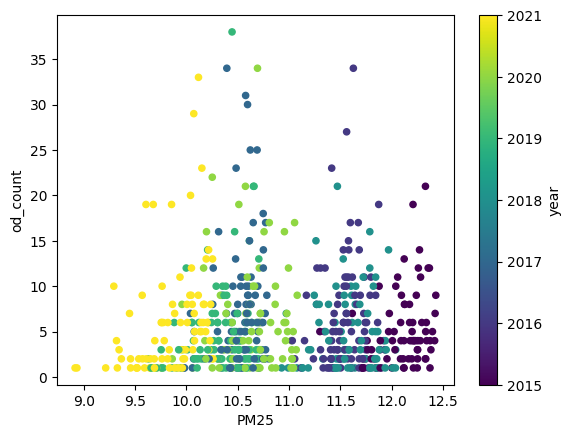

In [11]:
# moige + plawt
df = od_df.merge(pm25, on=["ZIP", "year"], how="inner", validate="1:1")
df.plot(x="PM25", y="od_count", kind="scatter", c="year", cmap='viridis')